### Importing libraries

In [1]:
import pandas as pd
import numpy as p
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

### Loading and reading Data

In [2]:
df = pd.read_csv("Happiness.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Dropping unnecessary columns

In [7]:
df.drop(columns = ['Standard Error','Dystopia Residual', 'Happiness Rank'], inplace = True)

In [8]:
df.head(2)

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


### Standardizing column names

In [9]:
df = df.rename(columns ={'Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Health', 'Trust (Government Corruption)':'Trust_govt'})

In [10]:
df.head(2)

,Country,Region,Happiness Score,GDP,Family,Health,Freedom,Trust_govt,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


### Univariate Analysis

In [11]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

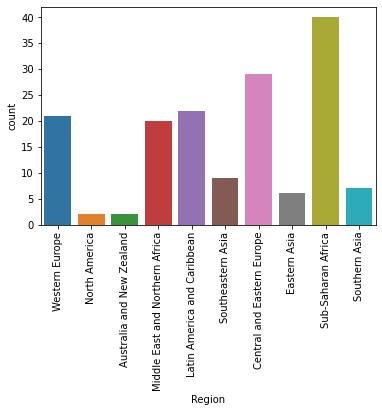

In [12]:
sns.countplot(x = 'Region', data=df)
plt.xticks(rotation=90)
plt.show()

### Bi Variate analysis

### Happiness Score vs GDP

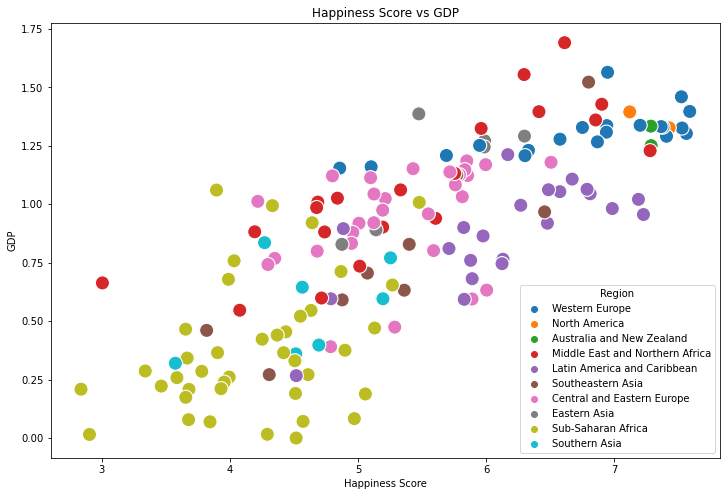

In [13]:
plt.figure(figsize=(12,8))
plt.title("Happiness Score vs GDP")
sns.scatterplot(data = df, x=df['Happiness Score'], y=df['GDP'], hue=df['Region'],s=200)
plt.xlabel('Happiness Score')
plt.ylabel('GDP')
plt.show()

### GDP contribution by Region

In [14]:
gdp_region = df.groupby('Region')['GDP'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP, dtype: float64

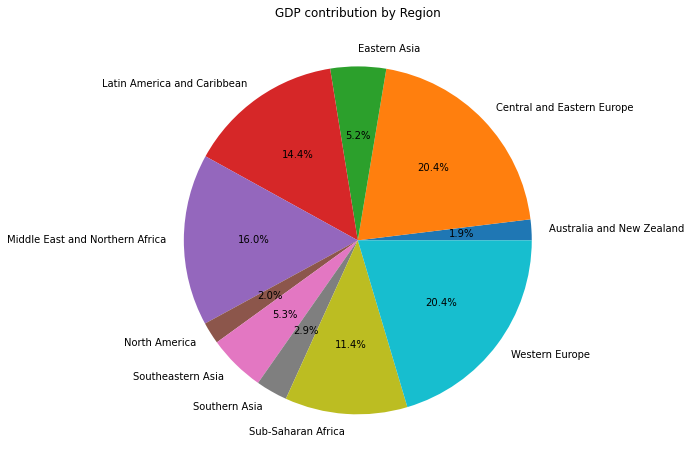

In [15]:
plt.figure(figsize=(8,8))
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP contribution by Region')
plt.ylabel('')
plt.show()

In [16]:
country_region = df.groupby('Region')['Country'].count()

In [17]:
country_region

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Country, dtype: int64

### Heat Map

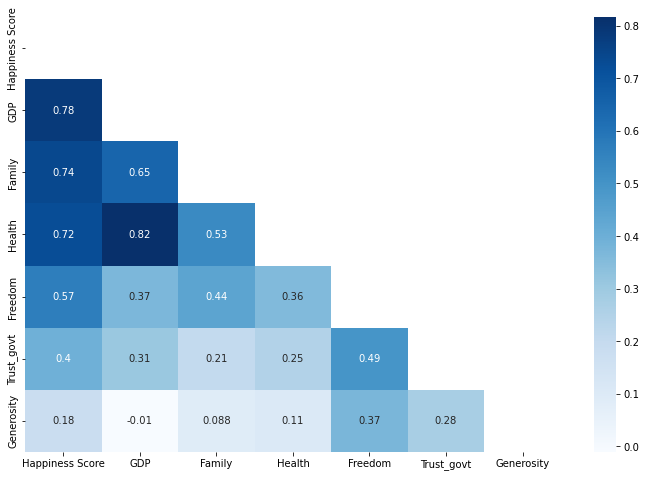

In [18]:
plt.figure(figsize=(12,8))
cor = df.corr()
m = np.triu(cor)
sns.heatmap(cor, cmap='Blues', annot = True, mask = m)
plt.show()

### Trust by Region

In [19]:
trust_reg = df.groupby('Region')[['Trust_govt']].mean()
trust_reg

,Trust_govt
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


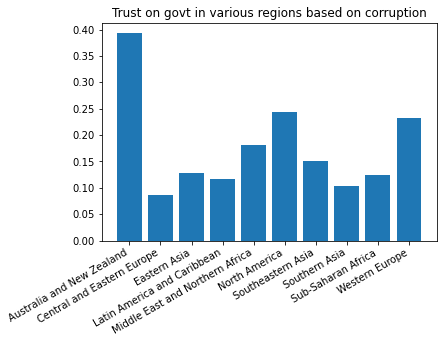

In [20]:
plt.title('Trust on govt in various regions based on corruption')
plt.bar(trust_reg.index, trust_reg.Trust_govt)
plt.xticks(rotation=30, ha ='right')
plt.show()

### Life Expectancies

In [21]:
top_10 = df.head(10)
bottom_10 = df.tail(10)

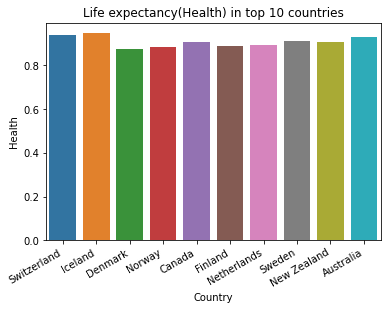

In [22]:
plt.title('Life expectancy(Health) in top 10 countries')
sns.barplot(x=top_10.Country, y=top_10.Health)
plt.xticks(rotation=30, ha ='right')
plt.show()

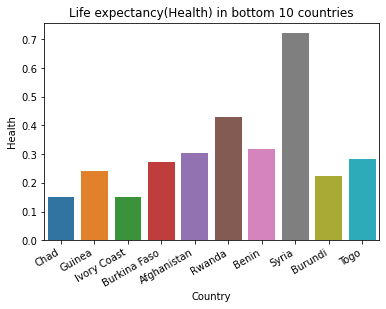

In [23]:
plt.title('Life expectancy(Health) in bottom 10 countries')
sns.barplot(x=bottom_10.Country, y=bottom_10.Health)
plt.xticks(rotation=30, ha ='right')
plt.show()

### Freedom vs Happiness Score

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

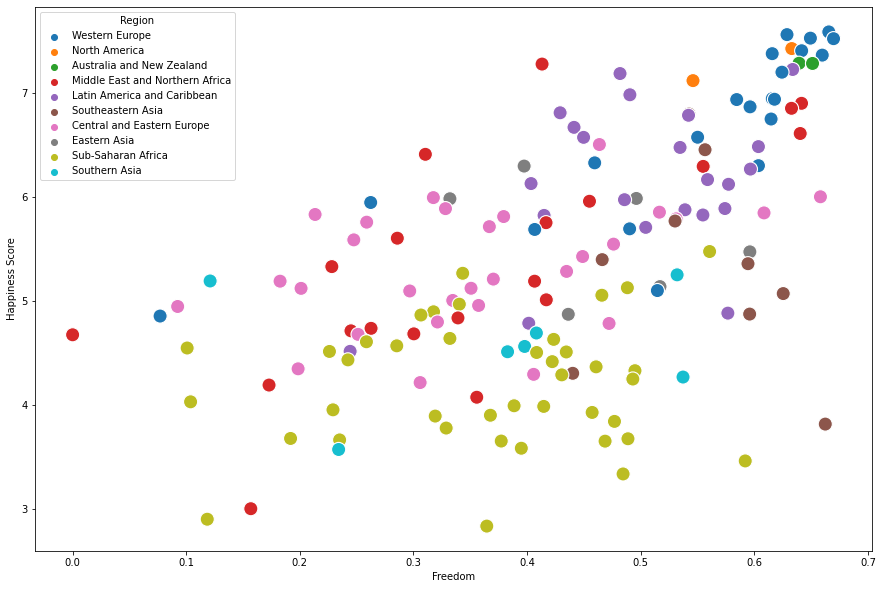

In [24]:
plt.figure(figsize =(15,10))
sns.scatterplot(x = df['Freedom'], y = df['Happiness Score'], hue=df['Region'], s=200)

In [25]:
most_corrupt = df.sort_values(by = 'Trust_govt').head(10)
most_corrupt

,Country,Region,Happiness Score,GDP,Family,Health,Freedom,Trust_govt,Generosity
73,Indonesia,Southeastern Asia,5.399,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535
95,Bosnia and Herzegovina,Central and Eastern Europe,4.949,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808
85,Romania,Central and Eastern Europe,5.124,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748
133,Bulgaria,Central and Eastern Europe,4.218,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921
55,Lithuania,Central and Eastern Europe,5.833,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641
87,Portugal,Western Europe,5.102,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719
40,Trinidad and Tobago,Latin America and Caribbean,6.168,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844
101,Greece,Western Europe,4.857,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000
51,Moldova,Central and Eastern Europe,5.889,0.59448,1.01528,0.61826,0.32818,0.01615,0.20951
64,Jamaica,Latin America and Caribbean,5.709,0.81038,1.15102,0.68741,0.50442,0.02299,0.21230


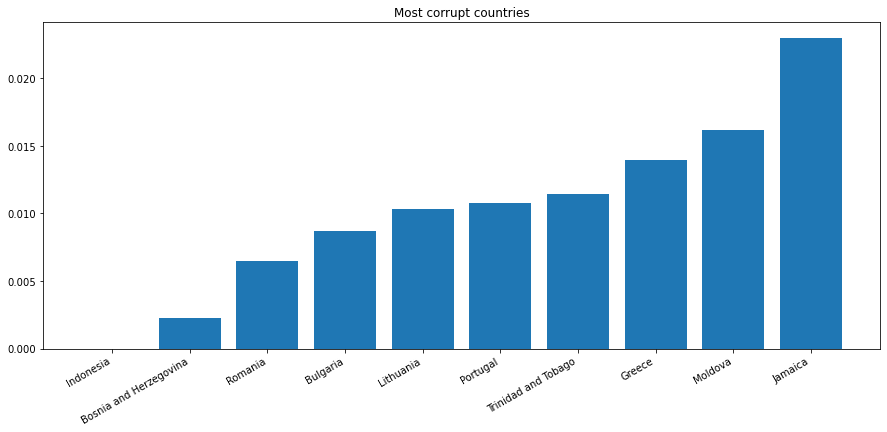

In [26]:
plt.figure(figsize =(15,6))
plt.title('Most corrupt countries')
plt.bar(most_corrupt.Country, most_corrupt['Trust_govt'])
plt.xticks(rotation=30, ha='right')
plt.show()

In [27]:
df.head(2)

,Country,Region,Happiness Score,GDP,Family,Health,Freedom,Trust_govt,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


In [36]:
df= df.drop(columns =['Country','Region'])

In [37]:
X = df.drop('Happiness Score' , axis = 1 ) 
y = df['Happiness Score']

In [38]:
X

,GDP,Family,Health,Freedom,Trust_govt,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [39]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

### Train Test Split

In [40]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20, random_state=42)

In [41]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)

## Model Building

In [42]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [44]:
print(f"Linear Regression R^2 : {lr.score(X_test , y_test)}")

Linear Regression R^2 : 82.94705100069292
